test_label[0]=7
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000
00000000000054b99f973c2400000000000000000000000000000000
000000000000defefefefef1c6c6c6c6c6c6c6c6aa34000000000000
00000000000043724872a3e3fee1fefefefae5fefe8c000000000000
000000000000000000000011420e4343433b15ecfe6a000000000000
00000000000000000000000000000000000053fdd112000000000000
000000000000000000000000000000000016e9ff5300000000000000
000000000000000000000000000000000081feee2c00000000000000
000000000000000000000000000000003bf9fe3e0000000000000000
0000000000000000000000000000000085febb050000000000000000
00000000000000000000000000000009cdf83a000000000000000000
000000000000000

<Figure size 1200x1400 with 0 Axes>

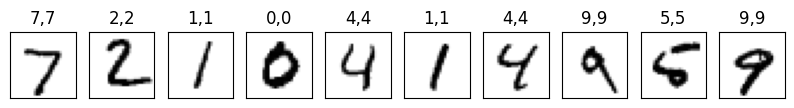

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np

def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
	plt.gcf().set_size_inches(12, 14)
	if num > 25:
		num = 25
	fig = plt.figure(figsize=(10,4))
	for i in range(num):
		ax = plt.subplot(1, 10, i + 1)
		ax.imshow(images[start_id], cmap="binary")

		title=str(labels[start_id])+','
		if (len(predictions)>0):
			title+=str(predictions[start_id])
		ax.set_title(title, fontsize=12)
		ax.set_xticks([])
		ax.set_yticks([])
		start_id += 1
	plt.show()

(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
print('test_label[0]='+str(test_label[0]))
for i in range(28):
	for j in range(28):
		print(hex(test_feature[0][i][j]).replace('0x','').zfill(2), end='')
	print("")
print('test_feature.shape=',test_feature.shape)
print('test_label.shape=',test_label.shape)
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype("float32")
test_feature_normalize = test_feature_vector / 255
model=load_model('Mnist_mlp_model.h5')
print('test_feature_normalize.shape=',test_feature_normalize.shape)
prediction=model.predict(test_feature_normalize)
prediction=np.argmax(prediction, axis=1)
show_images_labels_predictions(test_feature, test_label, prediction, 0, 10)
